Griffin Shelor\
20-3-2024

# In-class Exercises: Datetime and Pandas

In [9]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Q1. Following the same steps as the lecture, read the file 'lecture16_landslides.csv' into a `pandas DataFrame`

* Parse the column 'event_date' into `datetime64` data type. 
* Make a new column that stores the year of the event as an integer

In [10]:
## reading in data, conterting data to datetime
ldf = pd.read_csv("lecture16_landslides.csv", parse_dates=["event_date"])
## adding year column
ldf["year"] = ldf["event_date"].dt.year

/var/folders/mn/cz5gy25n1yg1r_ksn1lp_81r0000gn/T/ipykernel_91345/2296168915.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ldf = pd.read_csv("lecture16_landslides.csv", parse_dates=["event_date"])


### Q2. Group the dataframe by 'year' and make a bar chart of number of events in each year

Add axes labels to the chart.

What do you notice?

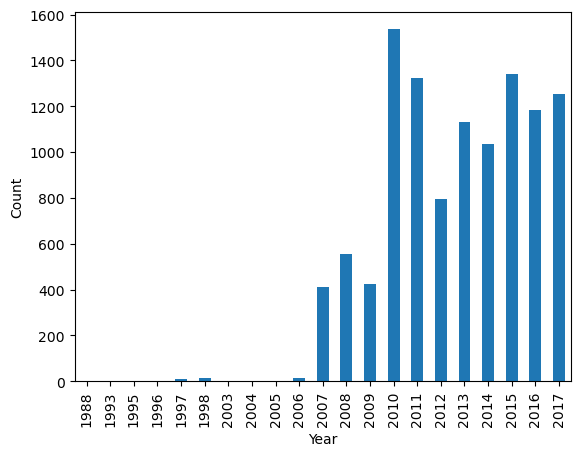

In [11]:
ldf_yrgrp = ldf.groupby(['year'])

# plot event counts by year
ldf_yrgrp["event_id"].count().plot(kind='bar') # any non-null column would work
plt.ylabel("Count")
plt.xlabel("Year");

Answer: The x-axis skips years from 1988 to 1993 and also from 1998 to 2003 but shows the same distance between years as if they are 1 year apart instead of 5.

### Q3. Extract the day of the week (e.g., Monday, Tuesday, etc.) from the 'event_date' column and add this to the Q1 `DataFrame` with a column name 'weekday'
* For `datetime64` columns, we can get the day of the week with `['mycolumn'].dt.day_name()`




In [12]:
ldf['weekday'] = ldf['event_date'].dt.day_name()

### Q4. Apply `groupby` to 'weekday' and plot two bar charts:
1. One for the total number of events each day of the week
2. Another for the mean 'injury_count' of each day of the 

Add axes labels to both charts.

Do you see significant differences by day of the week? If so, do you think they are meaningful or random?

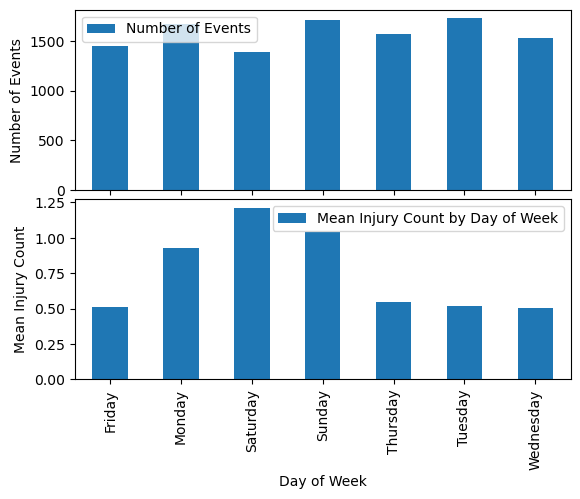

In [13]:
ldf_weekdaygrp = ldf.groupby(['weekday'])

# figure setup
fig, axi = plt.subplots(2,1,sharex=True)
fig.subplots_adjust(hspace=0.05)

ldf_weekdaygrp["event_id"].count().plot(kind='bar', ax=axi[0], label = "Number of Events")

ldf_weekdaygrp["injury_count"].mean().plot(kind='bar', ax=axi[1], label="Mean Injury Count by Day of Week")

# formatting
axi[0].legend()
axi[1].legend()
axi[0].set_ylabel("Number of Events")
axi[1].set_ylabel("Mean Injury Count")
axi[1].set_xlabel("Day of Week");

Answer: There does appear to be a significant difference injuries by weekday, but the values are so small that it is likely random, especially since the number of events is very similar across each day.

### Q5. Read in the file 'lecture16_prices.csv' into a `DataFrame`, parsing the appropriate date column. This file has prices for Apple and Google stock.

In [14]:
## reading in data, conterting data to datetime
prices = pd.read_csv("lecture16_prices.csv", parse_dates=["date"])
# prices

### Q6. In a single figure, plot 'date' on the x-axis vs 'close' y-axis for the two stocks (symbols AAPL and GOOG). This plot should be a `twinx()` plot (see below) and have two different y-axis scales. The left y-axis should be for Apple stock and the right y-axis for Google stock. Place appropriate labels on x and both y axes.

`twinx` plots with twin axes can be made as follows:
* `fig, ax1 = plt.subplots()` # ax1 is the standard axis
* `ax2 = ax1.twinx()` # ax2 is its twin

You can plot data on the two different axes with:
* `ax1.plot(...)`
* `ax2.plot(...)`

[Note that the final figure in lecture shows an example of using `twinx`.] 

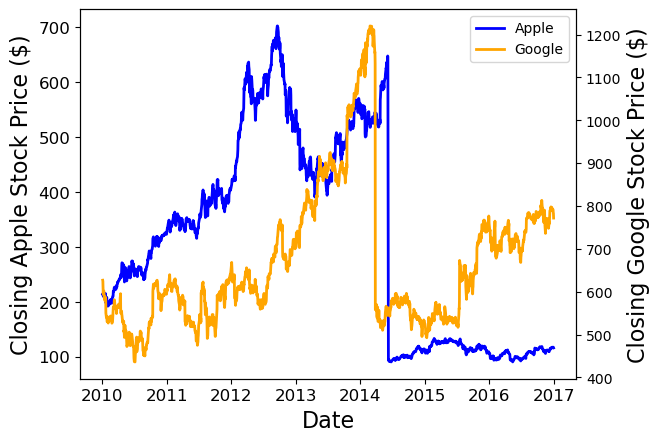

In [15]:
## creating separate dfs for each company
prices_apple = prices[prices['symbol'] == 'AAPL']
prices_google = prices[prices['symbol'] == 'GOOG']

# plot date versus closing stock price
fig, axi = plt.subplots()
axi.plot(prices_apple["date"], prices_apple["close"], color = "blue",lw = 2, label = "Apple")
axi.set_xlabel("Date", fontsize=16)
axi.set_ylabel("Closing Apple Stock Price ($)", fontsize=16)
axi.tick_params(labelsize=12)
# axi.legend()

# plot google prices on separate axis
axi2 = axi.twinx()
axi2.plot(prices_google["date"], prices_google["close"], color="orange", lw = 2, label = "Google")
axi2.set_ylabel("Closing Google Stock Price ($)", fontsize=16)
lines, labels = axi.get_legend_handles_labels()
lines2, labels2 = axi2.get_legend_handles_labels()
axi2.legend(lines + lines2 , labels + labels2, loc = 'best');

### Save your notebook and output an html version. To receive credit for this in-class exercise upload both the .html and .ipynb files.